# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)

Here is a sample of how the final result should look like:

In [3]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,14000000,"34 years, 6 months, 8 days"


##1. Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Use the "contracts.csv" that is provided to you.

1.1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Players with id 1630597 & 1630492 (These guys are a problem ;))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.endpoints import commonallplayers
import time
from unidecode import unidecode
from functools import reduce
from datetime import datetime
from dateutil import relativedelta
import seaborn as sns

In [2]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list():
    nba_player_df = commonallplayers.CommonAllPlayers().get_data_frames()[0] # Import data
    nba_player_df = nba_player_df[nba_player_df['ROSTERSTATUS'] == 1] # Filter active players
    nba_player_df = nba_player_df[nba_player_df['GAMES_PLAYED_FLAG'] == 'Y'] # Filter by games played flag
    nba_player_df.drop([4096, 4404], axis=0, inplace=True) # Drop problematic guys
    return nba_player_df

In [3]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")

*Don't change anything in this cell, just make it run correctly*

In [4]:
if current_players_list.shape == (503, 16):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


1.2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [5]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.

def get_players_personal_information(current_players_list):
    nba_player_info = pd.DataFrame()
    for i in current_players_list['PERSON_ID']: # Get the players id wanted
        player_info = commonplayerinfo.CommonPlayerInfo(player_id=i).get_data_frames()[0] # iterate in the request data by each player id wanted
        nba_player_info = nba_player_info.append(player_info) # append each player data in a dataframe
        time.sleep(0.6)  # delay to avoid rate limit
    return nba_player_info

In [6]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")

*Don't change anything in this cell, just make it run correctly*

In [7]:
if players_personal_info.shape == (503, 33):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


1.3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

In [12]:
players_personal_info = pd.read_csv('nba_players_personal_info.csv')

In [13]:
### Complete in this cell: find players career stats, save to csv file

def get_players_career_stats(current_players_list):
    nba_player_career = pd.DataFrame() # empty data frame to append each player data
    for i in players_personal_info['PERSON_ID']: 
        player_career = playercareerstats.PlayerCareerStats(player_id=i).get_data_frames()[0] # request of each player dataframe
        nba_player_career = nba_player_career.append(player_career) # append each player in one dataframe
        time.sleep(0.6) # delay to avoid rate limit
    nba_player_career = nba_player_career[nba_player_career['SEASON_ID'] == '2020-21'] # Filter by season
    nba_player_career = nba_player_career[nba_player_career['TEAM_ID'] != 0] # filter by team ID not equal to 0
    nba_player_career = pd.merge(players_personal_info, nba_player_career, how='left', left_on=['PERSON_ID', 'TEAM_ID'], right_on=['PLAYER_ID', 'TEAM_ID']) # merge of the last datasets obtained
    nba_player_career= nba_player_career[['PERSON_ID', 'TEAM_ID','PLAYER_AGE', 'GP', 'GS', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A','FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL','BLK', 'TOV', 'PF', 'PTS']]
    return nba_player_career

In [14]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

*Don't change anything in this cell, just make it run correctly*

In [15]:
if players_career_stats.shape == (503, 24):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


1.4- Create a function to find players salary for this season. You can get the list of players and salaries from this file: [contracts.csv](https://drive.google.com/file/d/1bxjuIZfMS2_kickukdC3ggdXIVeZE5y7/view?usp=sharing). Download and use this file as input for your function `get_nba_players_salaries()`.

Also, inside this function, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

*Hint:* Using data from the Basketball Reference page, you will have to solve 3 kinds of problems:
1. Special characters that need to be removed.
2. Duplicated values (for which you should keep just the first value) and,
3. Players names not matching with the ones from the API. 

The latter problem has multiple causes, one of them is that some names are written with non ascii characters, we advice you to install and use [Unidecode](https://pypi.org/project/Unidecode/) library to solve this issue.

In [3]:
nba_players_personal_info = pd.read_csv('nba_players_personal_info.csv')

In [18]:
### Complete in this cell: find players salary, save the information to csv

def get_nba_players_salaries(csv_file_path):    
    contracts = pd.read_csv('contracts.csv', header=1) # Get data
    del contracts['Rk'] # remove columns that are not of interest 
    contracts['Player'] = contracts['Player'].apply(lambda x: unidecode(x)) # remove characters unwanted
    contracts['2021-22'] = contracts['2021-22'].str.replace(r'\W', '') # remove characters ($) unwanted
    contracts['Player'] = contracts['Player'].str.split('\\').str[0] # split to get player clean name
    contracts = contracts[['Player', '2021-22']] # keep only the columns of interest
    contracts = contracts.drop_duplicates(keep='first') # drop duplicates values
    contracts[['Name', 'Lastname', 'Title']] = contracts['Player'].str.split(' ', expand=True) # split names with "Jr, I, II, Sr"... etc at the end
    nba_players_personal_info[['Name', 'Lastname', 'Title']] = nba_players_personal_info['DISPLAY_FIRST_LAST'].str.split(' ', expand=True) # split names with "Jr, I, II, Sr"... etc at the end
    contracts['CLEAN_NAME'] = contracts['Name'] + ' ' + contracts['Lastname'] # create a column clean name without names with "Jr, Sr" etc.
    nba_players_personal_info['CLEAN_NAME'] = nba_players_personal_info['Name'] + ' ' + nba_players_personal_info['Lastname'] # create a column clean name without names with "Jr, Sr" etc.
    personal_info_contr = pd.merge(nba_players_personal_info, contracts, how='left', on='CLEAN_NAME') # merge personal info with contracts info
    personal_info_contr = personal_info_contr.rename(columns={'2021-22':'SALARY', 'CLEAN_NAME':'PLAYER_NAME'}) # rename columns
    personal_info_contr = personal_info_contr[['PERSON_ID', 'PLAYER_NAME', 'SALARY']]
    return personal_info_contr

In [19]:
players_salaries = get_nba_players_salaries("contracts.csv")
players_salaries.to_csv("nba_players_salary.csv")

*Don't change anything in this cell, just make it run correctly*

In [20]:
index_salary_1 = players_salaries[players_salaries['PLAYER_NAME']=='Kyrie Irving'].index.values[0]
index_salary_2 = players_salaries[players_salaries['PLAYER_NAME']=='Luke Kennard'].index.values[0]

if players_salaries.SALARY.loc[index_salary_1] == '34916200' and players_salaries.SALARY.loc[index_salary_2] == '12727273':
    print('Success!')
else:
    raise ValueError('The salaries are incorrect, please review your function')

Success!


1.5- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [7]:
players_salaries = pd.read_csv('nba_players_salary.csv')
players_career_stats = pd.read_csv('nba_players_career_stats.csv')
players_personal_info = pd.read_csv('nba_players_personal_info.csv')
players_next_game = players_personal_info[['PERSON_ID',"SEASON_EXP", "DRAFT_NUMBER"]]

In [8]:
### Complete in this cell: merge the dataframes
def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
    dfs = [players_personal_info, players_career_stats, players_next_game, players_salaries] # list of dataframes to be used in reduce function
    raw_nba_players_dataset = reduce(lambda left, right: pd.merge(left, right, on='PERSON_ID'), dfs) # Use reduce function to merge each dataset with the previous
    raw_nba_players_dataset = raw_nba_players_dataset[["DISPLAY_FIRST_LAST","TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP_y", "DRAFT_NUMBER_y", "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK", "SALARY"]]
    return raw_nba_players_dataset

In [9]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

*Don't change anything in this cell, just make it run correctly*

In [10]:
if raw_players_dataset.shape == (503, 17):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


##2. Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value

2.1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [47]:
raw_players_dataset = pd.read_csv('raw_nba_players_dataset.csv', index_col=0)

In [48]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
def copy_and_delete_nan(players_dataset):
    working_df = raw_players_dataset.copy()
    working_df = working_df.dropna(subset=['SALARY']) # drops NaN salaries
    return working_df

In [49]:
working_df = copy_and_delete_nan(raw_players_dataset)

*Don't change anything in this cell, just make it run correctly*

In [50]:
if working_df.shape == (433, 17):
    print('Success!')
else:
    raise ValueError('The shape is incorrect, please review your function')

Success!


2.2- Cast Salary and Birthday columns to its corresponding type (int, datetime)

In [51]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
    working_df['SALARY'] = working_df['SALARY'].astype('int64') # convert salary colum as int 
    working_df['BIRTHDATE'] = pd.to_datetime(working_df['BIRTHDATE'], errors='coerce') # convert birthdate column as datetime
    return working_df

In [52]:
cast_columns(working_df)

,DISPLAY_FIRST_LAST,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP_y,DRAFT_NUMBER_y,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
0,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2711280
1,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20,9,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17073171
2,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18,5,14,64.0,2143.0,1197.0,573.0,346.0,75.0,66.0,28103550
3,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994520
4,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19,16,2,5.0,130.0,64.0,24.0,13.0,3.0,11.0,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Delon Wright,Wizards,Guard,6-5,185,USA,1992-04-26,7,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8526316
499,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21,15,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14190000
500,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19,4,5,63.0,2125.0,1594.0,245.0,594.0,53.0,12.0,8326471
501,Omer Yurtseven,Heat,Center,6-11,275,Turkey,1998-06-19,1,Undrafted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1489065


*Don't change anything in this cell, just make it run correctly*

In [53]:
if working_df.SALARY.dtype == 'int64' and working_df.BIRTHDATE.dtype == '<M8[ns]':
    print('Success!')
else:
    raise ValueError('The types are incorrect, please review your function')

Success!


2.3- Create a function that converts the height column from height in feet and inches to centimeters

In [54]:
### Complete in this cell: convert height column
def convert_height_column(working_df):
    working_df[['FEETS', 'INCHES']] = working_df['HEIGHT'].str.split('-', expand=True).astype('int64') # split feets and inches as a independent columns
    working_df['FEETS_tocm'] = working_df['FEETS'] * 30.48 # convert feets to cm
    working_df['INCHES_tocm'] = working_df['INCHES'] * 2.54 # convert inches to cm
    working_df['HEIGHT_CM'] = working_df['FEETS_tocm'] + working_df['INCHES_tocm'] # create a column with the sum of the inches and feet as cm
    working_df['HEIGHT_CM'] = working_df['HEIGHT_CM'].round().astype('int64') 
    working_df = working_df[['DISPLAY_FIRST_LAST', 'TEAM_NAME', 'POSITION','HEIGHT_CM', 'WEIGHT', 'COUNTRY', 'BIRTHDATE', 'SEASON_EXP_y', 'DRAFT_NUMBER_y', 'GP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'SALARY']]
    working_df.columns = ['PLAYER_NAME', 'TEAM_NAME', 'POSITION','HEIGHT', 'WEIGHT', 'COUNTRY', 'BIRTHDATE', 'SEASON_EXP', 'DRAFT_NUMBER', 'GP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'SALARY']
    return working_df

In [57]:
working_df = convert_height_column(working_df)

*Don't change anything in this cell, just make it run correctly*

In [58]:
index_df_1 = working_df[working_df['PLAYER_NAME']=='Kyrie Irving'].index.values[0]
index_df_2 = working_df[working_df['PLAYER_NAME']=='Luke Kennard'].index.values[0]

if working_df.HEIGHT.loc[index_df_1] == 188 and working_df.HEIGHT.loc[index_df_2] == 196:
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')

Success!


2.4- Create a function that converts the weight column from pounds to kilograms

In [59]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):
    working_df['WEIGHT'] = (working_df['WEIGHT'] / 2.205).round() # convert weight as kilograms
    return working_df

In [60]:
working_df = convert_weight_column(working_df)
working_df[working_df['PLAYER_NAME']=='Kyrie Irving']

<ipython-input-59-7502f081d215>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['WEIGHT'] = (working_df['WEIGHT'] / 2.205).round()


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY
218,Kyrie Irving,Nets,Guard,188,88.0,Australia,1992-03-23,11,1,54.0,1886.0,1451.0,257.0,324.0,76.0,37.0,34916200


*Don't change anything in this cell, just make it run correctly*

In [61]:
if working_df.WEIGHT.loc[index_df_1] == 88 and working_df.WEIGHT.loc[index_df_2] == 93:
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')

Success!


2.5- Create a function that calculates the age in (years, months, days) and saves it in a new string column named "AGE", example: "22 years, 5 months, 25 days" 

In [62]:
### Complete in this cell: add age column
def add_age_column(working_df):
    working_df = convert_weight_column(working_df)
    date = working_df['BIRTHDATE'] # create a variable date for use in for loop   
    dates_final = []
    for i in date:
        end_date = datetime.now() # today date
        delta = relativedelta.relativedelta(end_date, i) # Diference between today date and birthdate
        date_diff = delta.years, 'Years,', delta.months, 'months,', delta.days, 'days' # create the format wanted
        date_dif = list(date_diff) # create a list of format wanted
        dates_final.append(date_diff) # apend each date 
    dates_final_df = pd.DataFrame(dates_final, columns=['no_years', 'stryear', 'no_months', 'strmonths', 'no_days', 'strdays']) # create a dataframe with previous list
    dates_final_df['BIRTHDAY_new'] = dates_final_df['no_years'].astype(str) + ' ' + dates_final_df['stryear'] + ' ' + dates_final_df['no_months'].astype(str) + ' ' + dates_final_df['strmonths'] + ' ' + dates_final_df['no_days'].astype(str) + ' ' +dates_final_df['strdays'] # create a format wanted in a single column
    working_df['AGE'] = dates_final_df['BIRTHDAY_new'] 
    return working_df

In [63]:
add_age_column(working_df).head()

<ipython-input-59-7502f081d215>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['WEIGHT'] = (working_df['WEIGHT'] / 2.205).round()
<ipython-input-62-0e5e2c4c88e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['AGE'] = dates_final_df['BIRTHDAY_new']


,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE
0,Precious Achiuwa,Raptors,Forward,203,46.0,Nigeria,1999-09-19,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2711280,"23 Years, 0 months, 5 days"
1,Steven Adams,Grizzlies,Center,211,54.0,New Zealand,1993-07-20,9,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17073171,"29 Years, 2 months, 4 days"
2,Bam Adebayo,Heat,Center-Forward,206,53.0,USA,1997-07-18,5,14,64.0,2143.0,1197.0,573.0,346.0,75.0,66.0,28103550,"25 Years, 2 months, 6 days"
3,Santi Aldama,Grizzlies,Forward-Center,211,44.0,Spain,2001-01-10,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994520,"21 Years, 8 months, 14 days"
4,LaMarcus Aldridge,Nets,Center-Forward,211,51.0,USA,1985-07-19,16,2,5.0,130.0,64.0,24.0,13.0,3.0,11.0,2641691,"37 Years, 2 months, 5 days"


2.6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [64]:
### Complete in this cell: disambiguation of the position column
def update_position(working_df):
    working_df = add_age_column(working_df)
    working_df = working_df.str.replace(['Center-Forward', 'Forward-Center', 'Forward-Guard', 'Guard-Forward'], ['Center', 'Center', 'Guard', 'Guard'])
    return working_df

In [65]:
working_df = update_position(working_df)

<ipython-input-59-7502f081d215>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['WEIGHT'] = (working_df['WEIGHT'] / 2.205).round()
<ipython-input-62-0e5e2c4c88e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  working_df['AGE'] = dates_final_df['BIRTHDAY_new']


AttributeError: 'DataFrame' object has no attribute 'str'

*Don't change anything in this cell, just make it run correctly*

In [66]:
if working_df.POSITION.loc[index_df_1] == 'Guard' and working_df.POSITION.loc[index_df_2] == 'Guard':
    print('Success!')
else:
    raise ValueError('The values are incorrect, please review your function')

Success!


2.7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [67]:
working_df.to_csv("nba_players_processed_dataset.csv")

##3. Analyzing and Visualizing data

Now that we have the data, let's do some work

3.1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (as a string, like: "22 years, 5 months, 25 days")
        - Oldest player age (as a string, like: "40 years, 2 months, 3 days")
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [2]:
nba_players_processed = pd.read_csv('nba_players_processed_dataset.csv')
nba_players_processed['native_foreign'] = ['Native' if i == 'USA' else 'Foreign' for i in nba_players_processed['COUNTRY']]

In [23]:
### Complete in this cell: print general metrics
      
usa_native = nba_players_processed['native_foreign'].value_counts()[0]
nba_foreing = nba_players_processed['native_foreign'].value_counts()[1]
nba_positions = nba_players_processed['POSITION'].value_counts()
rookies = nba_players_processed['SEASON_EXP'].value_counts()[1]


print('Total number of players: ' + str(usa_native + nba_foreing))   
print('Number of USA born players: ' + str(usa_native))
print('Number of foreign players: ' + str(nba_foreing))
print('Number of Guard: ' + str(nba_positions[0]))
print('Number of Forward: ' + str(nba_positions[1]))
print('Number of Center: ' + str(nba_positions[2]))
print('Number of rookies: ' + str(rookies))

Total number of players: 433
Number of USA born players: 327
Number of foreign players: 106
Number of Guard: 220
Number of Forward: 119
Number of Center: 94
Number of rookies: 55


In [24]:
# Number of players per team
nba_players_processed['TEAM_NAME'].value_counts()

Raptors          17
76ers            17
Rockets          17
Bulls            17
Lakers           17
Cavaliers        16
Pistons          16
Jazz             16
Suns             15
Pelicans         15
Wizards          15
Trail Blazers    15
Nets             15
Celtics          14
Clippers         14
Bucks            14
Thunder          14
Timberwolves     14
Hawks            14
Grizzlies        14
Nuggets          14
Spurs            13
Warriors         13
Heat             13
Hornets          13
Magic            13
Pacers           12
Knicks           12
Mavericks        12
Kings            12
Name: TEAM_NAME, dtype: int64

<AxesSubplot:xlabel='native_foreign', ylabel='count'>

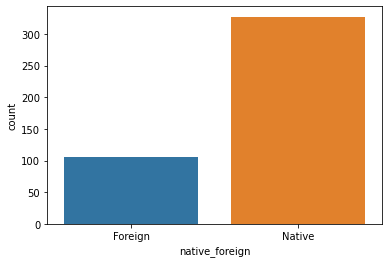

In [25]:
sns.countplot(data=nba_players_processed, x='native_foreign')

<AxesSubplot:xlabel='POSITION', ylabel='count'>

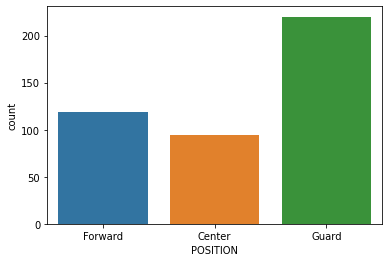

In [27]:
sns.countplot(data=nba_players_processed, x='POSITION')

In [40]:
### Complete in this cell: print players descriptions
nba_players_processed['BIRTHDATE'].min()
nba_players_processed[nba_players_processed['BIRTHDATE'] == '1980-06-09']

,Unnamed: 0,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE,native_foreign
165,186,Udonis Haslem,Heat,Forward,203,107.0,USA,1980-06-09,19,Undrafted,1.0,3.0,4.0,1.0,0.0,0.0,0.0,2641691,"24 Years, 6 months, 10 days",Native


In [42]:
nba_players_processed['BIRTHDATE'].max()
nba_players_processed[nba_players_processed['BIRTHDATE'] == '2002-12-24']

,Unnamed: 0,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,SALARY,AGE,native_foreign
329,374,Joshua Primo,Spurs,Guard,193,86.0,Canada,2002-12-24,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3946800,"26 Years, 10 months, 23 days",Foreign


In [66]:
# Average player age (in years)
avg_years = nba_players_processed['BIRTHDATE'].str.split('-', expand=True).astype(int)[0].mean()
avg_years = 2022 - avg_years
avg_years

26.923787528868388

In [69]:
# Min and Max players height
max_height = nba_players_processed['HEIGHT'].max()
min_height = nba_players_processed['HEIGHT'].min()

print('Max height: ' + str(max_height))
print('Min height: ' + str(min_height))

Max height: 221
Min height: 178


In [78]:
# Average height of players per position

avg_hei_pos = nba_players_processed.groupby('POSITION')['HEIGHT'].mean()
avg_hei_pos

POSITION
Center     209.500000
Forward    202.344538
Guard      193.240909
Name: HEIGHT, dtype: float64

In [83]:
### Complete in this cell: Contracts

# Min and Max salary of all players
print('Max salary: ' + 'USD'+str(nba_players_processed['SALARY'].max()))
print('Min salary: ' + 'USD'+str(nba_players_processed['SALARY'].min()))

Max salary: USD45780966
Min salary: USD85578


In [87]:
# Mean and Median salary of all players
print('Max salary: ' + 'USD'+str(round(nba_players_processed['SALARY'].mean(), 2)))
print('Max salary: ' + 'USD'+str(nba_players_processed['SALARY'].median()))

Max salary: USD8983219.93
Max salary: USD4670160.0


3.2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

<AxesSubplot:xlabel='GP', ylabel='SALARY'>

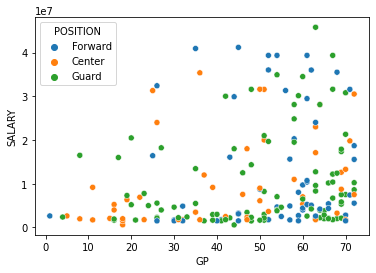

In [122]:
### Complete in this cell:  Relationship between scoring and salary (in millions of dollars)
sns.scatterplot(x='GP', y='SALARY', data=nba_players_processed,
               hue='POSITION')

3.3- Now plot assists-vs-salary and rebounding-vs-salary

<AxesSubplot:xlabel='AST', ylabel='SALARY'>

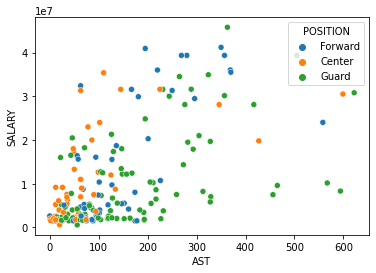

In [126]:
### Complete in this cell: plot assist-vs-salary, rebounding-vs-salary
sns.scatterplot(x='AST', y='SALARY', data=nba_players_processed,
               hue='POSITION')

<AxesSubplot:xlabel='REB', ylabel='SALARY'>

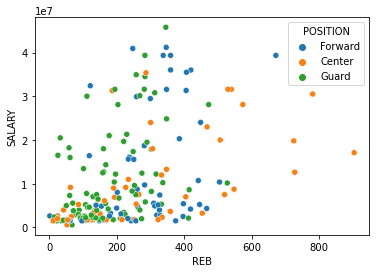

In [125]:
sns.scatterplot(x='REB', y='SALARY', data=nba_players_processed,
               hue='POSITION')

3.4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

In [128]:
### Complete in this cell: non rookie contracts
non_rookie = nba_players_processed[nba_players_processed['SEASON_EXP'] > 4]

<AxesSubplot:xlabel='GP', ylabel='SALARY'>

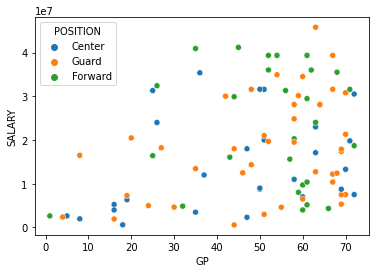

In [133]:
sns.scatterplot(x='GP', y='SALARY', data=non_rookie,
               hue='POSITION')

<AxesSubplot:xlabel='GP', ylabel='SALARY'>

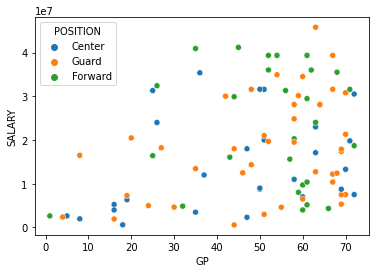

In [131]:
sns.scatterplot(x='GP', y='SALARY', data=non_rookie,
               hue='POSITION')

<AxesSubplot:xlabel='AST', ylabel='SALARY'>

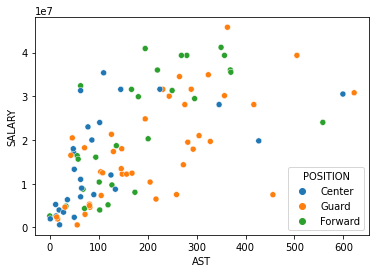

In [132]:
sns.scatterplot(x='AST', y='SALARY', data=non_rookie,
               hue='POSITION')

3.5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

<AxesSubplot:xlabel='POSITION', ylabel='GP'>

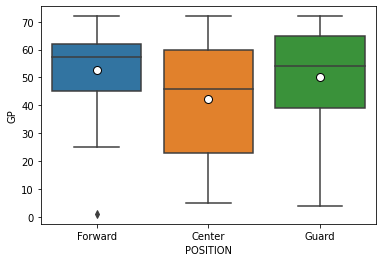

In [10]:
### Complete in this cell: Scoring average grouped by position
sns.boxplot(x='POSITION', y='GP', data=nba_players_processed, showmeans=True, meanprops={'marker':'o'
                                                                                        ,'markerfacecolor':'white'
                                                                                        ,'markersize':'8'
                                                                                        ,'markeredgecolor':'black'})

3.6- Plot the Height distribution of all players

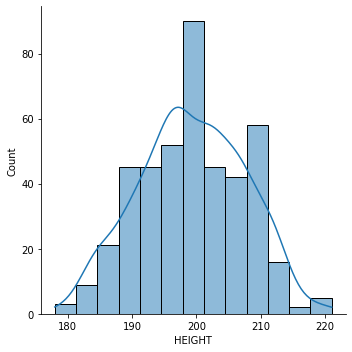

In [11]:
### Complete in this cell: height distribution
sns.displot(x='HEIGHT', data=nba_players_processed, kde=True)

OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

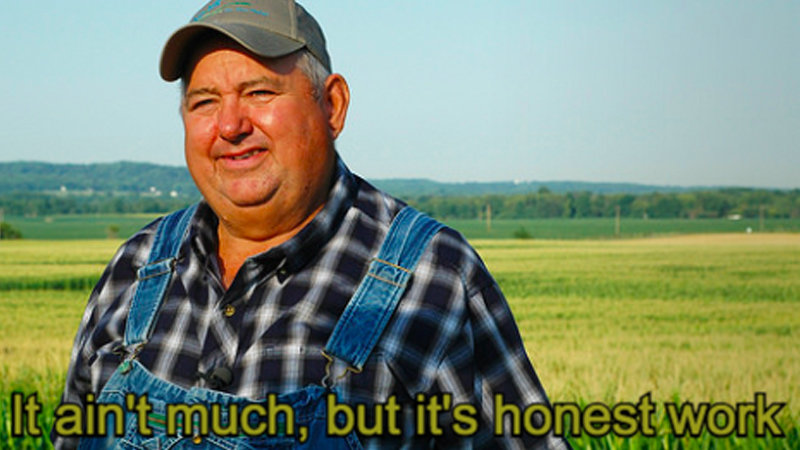